In [ ]:
pip install bresenham

In [ ]:
#System imports 
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import math
from bresenham import bresenham
from random import shuffle
from random import randint 
from random import random 

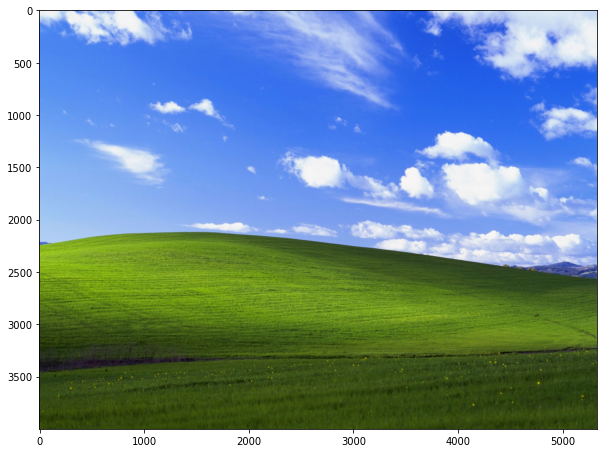

In [ ]:
#Read image
img = cv2.cvtColor(cv2.imread('/content/images/windows.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
def base_implementation(img):
    #Create brushes/strokes
    img_diag = math.sqrt(img.shape[0]**2+img.shape[1]**2)
    brush_width = int(img_diag / 150)
    brush_length = int(img_diag / 75)
    brush_theta = (math.pi)/4.0

    #Get downsampled image
    ratio = 0.3
    downsampled = cv2.resize(img, (int(img.shape[1]*ratio), \
        int(img.shape[0]*ratio)))

    #Get shuffled pixels
    pixels = []
    for y in range(downsampled.shape[0]):
        for x in range(downsampled.shape[1]):
            pixels.append((x,y))
    shuffle(pixels)

    #Generate brush strokes for each pixel
    x_offset = int(math.cos(brush_theta) * brush_length)
    y_offset = int(math.sin(brush_theta) * brush_length)
    output = np.clip(img.copy(), a_min=0, a_max=0)
    for pixel in pixels:
        x = pixel[0]
        y = pixel[1]
        start = (int(x / ratio), int(y / ratio))
        end = (start[0] - x_offset, start[1] - y_offset)
        color = tuple(int(temp) for temp in downsampled[y][x].astype(int))
        output = cv2.line(output, start, end, color, brush_width)

    #Display result
    plt.figure(figsize=(10,10))
    plt.imshow(output)

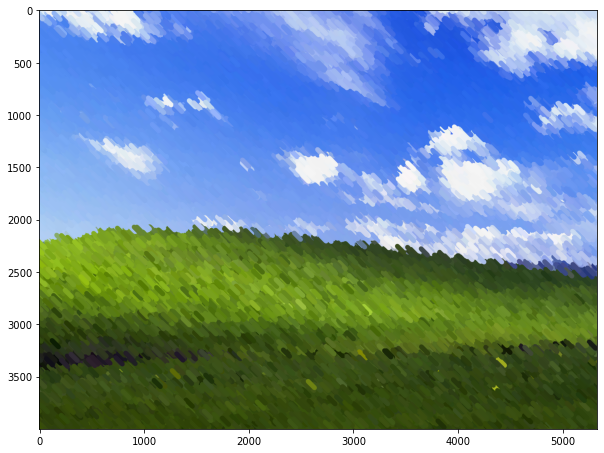

In [ ]:
base_implementation(img)

In [ ]:
def natural_errors(img):
    #Create brushes/strokes
    img_diag = math.sqrt(img.shape[0]**2+img.shape[1]**2)
    brush_width_range = [int(img_diag / 200), int(img_diag / 100)]
    brush_length_range = [int(img_diag / 100), int(img_diag / 50)]
    brush_theta = (math.pi)/4.0
    brush_theta_range = [-(math.pi)/4.0,(math.pi)/4.0]

    #Intensity range taken from Litwinowicz paper 
    intensity_range = [0.85, 1.15]

    #Get downsampled image
    ratio = 0.3
    downsampled = cv2.resize(img, (int(img.shape[1]*ratio), \
        int(img.shape[0]*ratio)))

    #Get shuffled pixels
    pixels = []
    for y in range(downsampled.shape[0]):
        for x in range(downsampled.shape[1]):
            pixels.append((x,y))
    shuffle(pixels)

    #Generate brush strokes for each pixel
    output = np.clip(img.copy(), a_min=0, a_max=0)
    for pixel in pixels: 
        brush_width = randint(brush_width_range[0],brush_width_range[1])
        brush_length = randint(brush_length_range[0],brush_length_range[1])
        theta = brush_theta + brush_theta_range[0] + \
            ((brush_theta_range[1] - brush_theta_range[0]) * random())
        x_offset = int(math.cos(theta) * brush_length / 2)
        y_offset = int(math.sin(theta) * brush_length / 2)
        x = pixel[0]
        y = pixel[1] 
        color = tuple(int(temp) for temp in \
            np.clip(downsampled[y][x].astype(int) * (intensity_range[0] + \
            ((intensity_range[1] - intensity_range[0])*random())), \
            a_min=0, a_max=255))
        start = (int(x / ratio ) + x_offset, int(y / ratio) + y_offset)
        end = (int(x / ratio ) - x_offset, int(y / ratio) - y_offset)
        output = cv2.line(output, start, end, color, brush_width)
    
    #Display result
    plt.figure(figsize=(10,10))
    plt.imshow(output)

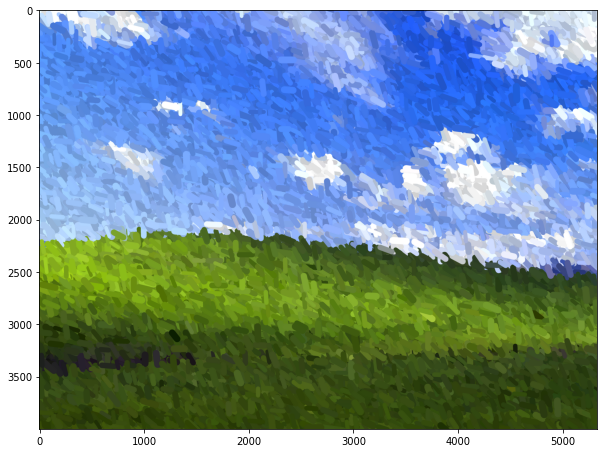

In [ ]:
natural_errors(img)

In [ ]:
def get_edges(img):
    #Edge Detecting with Canny:
    high_thresh = 255
    low_thresh = 200
    edges = cv2.Canny(img,high_thresh,low_thresh)

    #Display and return result
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return edges

In [ ]:
def find_end(start, end, img):
    #Get line of pixels with Bresenham's line algorithm
    path = list(bresenham(start[0],start[1],end[0],end[1]))

    #Check for edges in between start and end
    for point in path:
        
        #Ignore out-of-bound points
        if (point[1] < 0 or point[1] >= img.shape[0] or point[0] < 0 \
            or point[0] >= img.shape[1]):
            continue
        
        pixel = img[point[1]][point[0]]
        
        #Return maximum "walk" point if edge detected
        if (pixel > 0):
            return point

    #Return end if no edge detected
    return end

In [ ]:
def edge_detection(img):
    #Create brushes/strokes
    img_diag = math.sqrt(img.shape[0]**2+img.shape[1]**2)
    brush_width_range = [int(img_diag / 200), int(img_diag / 100)]
    brush_length_range = [int(img_diag / 100), int(img_diag / 50)]
    brush_theta = (math.pi)/4.0
    brush_theta_range = [-(math.pi)/4.0,(math.pi)/4.0]

    #Intensity Range Taken From Litwinowicz Paper 
    intensity_range = [0.85, 1.15]

    #Get downsampled image
    ratio = 0.3
    downsampled = cv2.resize(img, (int(img.shape[1]*ratio), \
        int(img.shape[0]*ratio)))

    #Get shuffled pixels
    pixels = []
    for y in range(downsampled.shape[0]):
        for x in range(downsampled.shape[1]):
            pixels.append((x,y))
    shuffle(pixels)

    #Generate brush strokes for each pixel
    output = np.clip(img.copy(), a_min=0, a_max=0)
    edges = get_edges(img)
    for pixel in pixels: 
        brush_width = randint(brush_width_range[0],brush_width_range[1])
        brush_length = randint(brush_length_range[0],brush_length_range[1])
        theta = brush_theta + brush_theta_range[0] + \
            ((brush_theta_range[1] - brush_theta_range[0]) * random())
        x_offset = int(math.cos(theta) * brush_length / 2)
        y_offset = int(math.sin(theta) * brush_length / 2)
        x = pixel[0]
        y = pixel[1] 
        color = tuple(int(temp) for temp in \
            np.clip(downsampled[y][x].astype(int) * (intensity_range[0] + \
            ((intensity_range[1] - intensity_range[0])*random())), \
            a_min=0, a_max=255))
        start = (int(x / ratio ) + x_offset, int(y / ratio) + y_offset)
        end = (int(x / ratio ) - x_offset, int(y / ratio) - y_offset)
        midpoint = (int(x / ratio), int(y / ratio))
        new_start = find_end(midpoint,start,edges)
        new_end = find_end(midpoint, end, edges)
        output = cv2.line(output, new_start, new_end, color, brush_width)
    
    #Display result
    plt.figure(figsize=(10,10))
    plt.imshow(output)

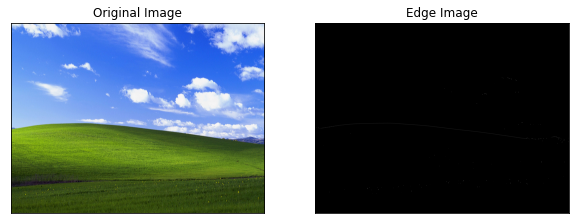

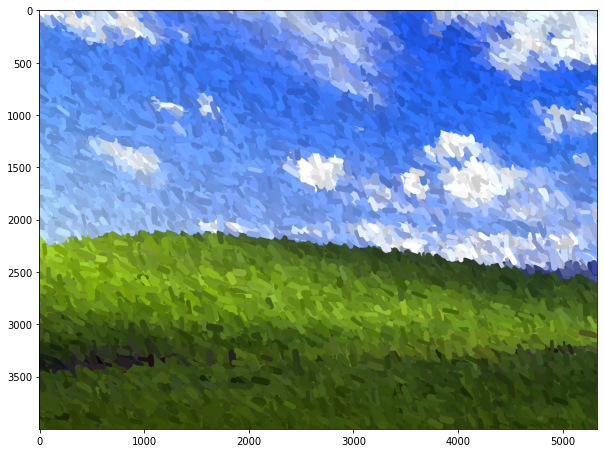

In [ ]:
edge_detection(img)

In [ ]:
def get_gradient(img):
    #Get grayscale image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #Generate x and y sobel images
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

    #Ignore divide-by-zero warnings for now
    with np.errstate(divide='ignore', invalid='ignore'):
        division = np.divide(sobely,sobelx)

    #Try to fix nan values with neighbor value interpolation
    mask = np.isnan(division)
    division[mask] = np.interp(np.flatnonzero(mask), \
        np.flatnonzero(~mask), division[~mask])
    
    #Clean up remaining nan values
    division = np.nan_to_num(division, 0)

    #Calculate and return gradiant array
    output = np.arctan(division) + math.pi / 2.0
    return output

In [ ]:
def gradient_matching(img):
    #Create brushes/strokes
    img_diag = math.sqrt(img.shape[0]**2+img.shape[1]**2)
    brush_width_range = [int(img_diag / 200), int(img_diag / 100)]
    brush_length_range = [int(img_diag / 100), int(img_diag / 50)]

    #Intensity Range Taken From Litwinowicz Paper 
    intensity_range = [0.85, 1.15]

    #Get downsampled image
    ratio = 0.3
    downsampled = cv2.resize(img, (int(img.shape[1]*ratio), \
        int(img.shape[0]*ratio)))

    #Get shuffled pixels
    pixels = []
    for y in range(downsampled.shape[0]):
        for x in range(downsampled.shape[1]):
            pixels.append((x,y))
    shuffle(pixels)

    #Generate brush strokes for each pixel
    thetas = get_gradient(img)
    output = np.clip(img.copy(), a_min=0, a_max=0)
    edges = get_edges(img)
    for pixel in pixels: 
        x = pixel[0]
        y = pixel[1]
        midpoint = (int(x / ratio), int(y / ratio))
        brush_width = randint(brush_width_range[0],brush_width_range[1])
        brush_length = randint(brush_length_range[0],brush_length_range[1])
        theta = thetas[midpoint[1],midpoint[0]]
        x_offset = int(math.cos(theta) * brush_length / 2)
        y_offset = int(math.sin(theta) * brush_length / 2)
        color = tuple(int(temp) for temp in \
            np.clip(downsampled[y][x].astype(int) * (intensity_range[0] + \
            ((intensity_range[1] - intensity_range[0])*random())), \
            a_min=0, a_max=255))
        start = (int(x / ratio ) + x_offset, int(y / ratio) + y_offset)
        end = (int(x / ratio ) - x_offset, int(y / ratio) - y_offset)
        new_start = find_end(midpoint,start,edges)
        new_end = find_end(midpoint, end, edges)
        output = cv2.line(output, new_start, new_end, color, brush_width)

    #Display and save result
    plt.figure(figsize=(10,10))
    plt.imshow(output)
    cv2.imwrite('/content/output.jpg',cv2.cvtColor(output, \
        cv2.COLOR_RGB2BGR))

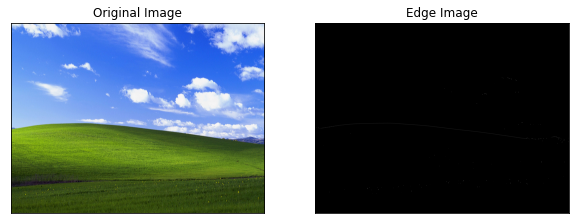

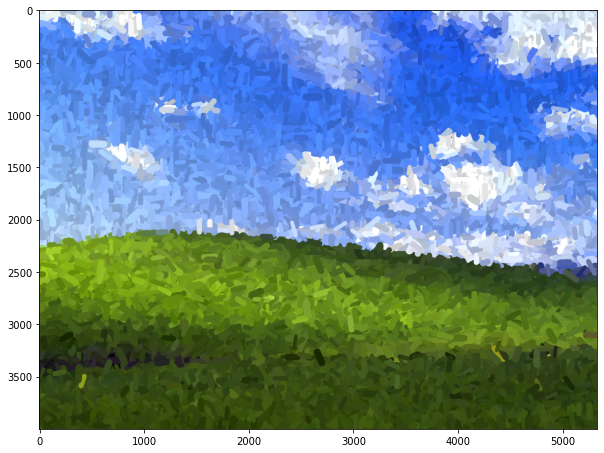

In [ ]:
gradient_matching(img)